In [1]:
#%%
import pickle as pkl
from collections import defaultdict
import pandas as pd

output_path = None

def load_results(predictions_path):
    '''
    Return dictionary with distribution of predictions by accent
    '''
    with open(predictions_path, "rb") as f:
        eval_data = pkl.load(f)
    
    predictions_by_accent = defaultdict(lambda: defaultdict(int))
    for prediction, accent in zip(eval_data["preds"], eval_data["accents"]):
        predictions_by_accent[accent][prediction] += 1

    return predictions_by_accent


    # results_by_accent = defaultdict(lambda: defaultdict(int))
    # print(list(zip(eval_data["preds"], eval_data["accents"], eval_data["labels"])))
    # for prediction, accent, label in zip(eval_data["preds"], eval_data["accents"], eval_data["labels"]):
    #     if prediction == label:
    #         results_by_accent[accent]["correct"] += 1
    #     results_by_accent[accent]["total"] += 1
    # # %%

    # # Merge "us" and "american"  accents
    # results_by_accent["us"] = {k: results_by_accent["us"].get(k, 0) + results_by_accent["american"].get(k, 0) for k in set(results_by_accent["us"]) | set(results_by_accent["american"])}
    # # results_by_accent["us"]["total"] = sum([results_by_accent["us"]["total"], results_by_accent["american"]["total"]])
    # del results_by_accent["american"]


    # for accent, results in results_by_accent.items():
    #     results_by_accent[accent]["accuracy"] = round(results["correct"]/results["total"], 1)
    #     print(f"Accuracy for {accent}: {results['correct']/results['total']}")
    #     print(f"Total samples for {accent}: {results['total']}")
    #     print()

    return results_by_accent

In [14]:
def print_top_3_confusions(preds_by_accent):
    # Normalize the predictions
    for accent, predictions in preds_by_accent.items():
        total = sum(predictions.values()) - predictions["en"]
        for prediction, count in predictions.items():
            preds_by_accent[accent][prediction] = round((count/total)*100, 1) if total > 0 else 0

    # Print out the top 3 confusions for each accent
    for accent, predictions in preds_by_accent.items():
        print(f"Top 3 confusions for {accent}:")
        for prediction, count in sorted([x for x in predictions.items() if x[0] != "en"], key=lambda x: x[1], reverse=True)[:3]:
            print(f"{prediction}: {count}")
        print()

def get_top_3_confusions(preds_by_accent):
    # Normalize the predictions
    for accent, predictions in preds_by_accent.items():
        total = sum(predictions.values()) - predictions["en"]
        for prediction, count in predictions.items():
            preds_by_accent[accent][prediction] = round((count/total)*100, 1) if total > 0 else 0

    top_confusions = defaultdict(lambda: defaultdict(float))
    for accent, predictions in preds_by_accent.items():
        for prediction, count in sorted([x for x in predictions.items() if x[0] != "en"], key=lambda x: x[1], reverse=True)[:3]:
            top_confusions[accent][prediction] = count

    return top_confusions

# def get_top_3_confusions_non_en(preds_by_accent):
#     # Normalize the predictions
#     for accent, predictions in preds_by_accent.items():
#         total = sum(predictions.values()) - predictions[lang]
#         for prediction, count in predictions.items():
#             preds_by_accent[accent][prediction] = round((count/total)*100, 1) if total > 0 else 0

#     top_confusions = defaultdict(lambda: defaultdict(float))
#     for accent, predictions in preds_by_accent.items():
#         for prediction, count in sorted([x for x in predictions.items() if x[0] != lang], key=lambda x: x[1], reverse=True)[:3]:
#             top_confusions[accent][prediction] = count
#             print(f"{prediction}: {count}")
#         print()

#     return top_confusions

In [16]:
et_predictions_path = "/home/hltcoe/nbafna/projects/mitigating-accent-bias-in-lid/prelim_evals/preds/formatted/cv_from_hf_predictions.pkl"
et_preds_by_accent = load_results(et_predictions_path)
et_top_confusions = get_top_3_confusions(et_preds_by_accent)
print_top_3_confusions(et_preds_by_accent)

Top 3 confusions for México:
es: 86.6
la: 6.3
eo: 1.8

Top 3 confusions for Andino-Pacífico: Colombia, Perú, Ecuador, oeste de Bolivia y Venezuela andina:
es: 88.7
la: 4.0
gl: 1.2

Top 3 confusions for América central:
es: 86.9
la: 5.0
ia: 0.9

Top 3 confusions for España: Centro-Sur peninsular (Madrid, Toledo, Castilla-La Mancha):
es: 69.4
ca: 11.8
gl: 11.1

Top 3 confusions for Rioplatense: Argentina, Uruguay, este de Bolivia, Paraguay:
es: 91.2
gl: 2.8
ia: 1.2

Top 3 confusions for España: Sur peninsular (Andalucia, Extremadura, Murcia):
es: 79.7
gl: 7.1
ca: 4.8

Top 3 confusions for Chileno: Chile, Cuyo:
es: 91.0
ca: 3.0
la: 3.0

Top 3 confusions for España: Norte peninsular (Asturias, Castilla y León, Cantabria, País Vasco, Navarra, Aragón, La Rioja, Guadalajara, Cuenca):
es: 57.1
gl: 17.6
ca: 12.4

Top 3 confusions for Caribe: Cuba, Venezuela, Puerto Rico, República Dominicana, Panamá, Colombia caribeña, México caribeño, Costa del golfo de México:
es: 87.9
la: 3.7
ca: 3.4

Top 3 

In [3]:

# %%

# ET model
# predictions_path = "/home/hltcoe/nbafna/projects/mitigating-accent-bias-in-lid/prelim_evals/preds/edacc_predictions/en_predictions.pkl"

# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-1000/cnn-attentions-linear-8/lid_model_outputs/predictions.pkl"
# SSL-based model
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-1000/cnn-attentions-linear-8/lid_model_outputs/predictions.pkl"
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-10000/cnn-attentions-linear-4/lid_model_outputs/predictions.pkl"
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-500/cnn-attentions-linear-4/lid_model_outputs/predictions.pkl"

# Phoneseq-based model
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/phoneseq_exps/vl107/wav2vec2-xlsr-53-espeak-cv-ft/attentions-linear-8/phoneseq_lid_model_outputs/edacc_predictions.pkl"
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/phoneseq_exps/fleurs/wav2vec2-xlsr-53-espeak-cv-ft/attentions-linear-8/phoneseq_lid_model_outputs/predictions.pkl"
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/fleurs/wav2vec2-large-xlsr-53-layer21-5000/cnn-attentions-linear-4/lid_model_outputs/predictions.pkl" 
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-10000/cnn-attentions-linear-4/lid_model_outputs/predictions.pkl"
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-500/cnn-attentions-linear-4/lid_model_outputs/predictions.pkl"
# predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/wav2vec2_intermediate_outputs/vl107/wav2vec2-base-layer8-10000/cnn-attentions-linear-8/lid_model_outputs/predictions.pkl"

# ET+Phoneseq model
predictions_path = "/exp/nbafna/projects/mitigating-accent-bias-in-lid/reps-phoneseq_exps/vl107/ecapa-tdnn_wav2vec2-xlsr-53-espeak-cv-ft/attentions-linear-8/reps-phoneseq_lid_model_outputs/edacc_predictions.pkl"
# output_path = "wav2vec2-base-layer8-100/accuracy.csv"


In [4]:
preds_by_accent = load_results(predictions_path)

In [9]:
preds_by_accent["us"]

defaultdict(int,
            {'en': 124,
             'ms': 1,
             'gv': 3,
             'da': 4,
             'fr': 1,
             'la': 1,
             'cy': 2,
             'is': 1,
             'ha': 1,
             'vi': 1,
             'af': 1,
             'nn': 1})

In [7]:

et_top_confusions = get_top_3_confusions(preds_by_accent)

In [51]:
ssl_top_confusions = get_top_3_confusions(preds_by_accent)

In [39]:
ps_top_confusions = get_top_3_confusions(preds_by_accent)

In [8]:
etps_top_confusions = get_top_3_confusions(preds_by_accent)


In [43]:
# Compare the top 3 confusions for each accent for both models 
for accent in et_top_confusions:
    print(f"Top 3 confusions for {accent}:")
    et_list = [(k, v) for k, v in et_top_confusions[accent].items()]
    ssl_list = [(k, v) for k, v in ssl_top_confusions[accent].items()]
    ps_list = [(k, v) for k, v in ps_top_confusions[accent].items()]
    etps_list = [(k, v) for k, v in etps_top_confusions[accent].items()]
    print(f"ET: {et_list}")
    print(f"SSL: {ssl_list}")
    print(f"PS: {ps_list}")
    print(f"ET+PS: {etps_list}")
    print("\n\n\n")

Top 3 confusions for scottish:
ET: [('cy', 43.8), ('da', 16.3), ('hr', 5.9)]
SSL: [('no', 8.4), ('is', 7.4), ('nl', 7.4)]
PS: [('cy', 54.0), ('fo', 10.3), ('no', 6.3)]
ET+PS: [('cy', 55.7), ('gv', 9.4), ('da', 8.7)]




Top 3 confusions for sinhalese:
ET: [('gv', 13.1), ('la', 13.1), ('fa', 11.5)]
SSL: [('fa', 10.0), ('cy', 6.7), ('pt', 6.7)]
PS: [('cy', 39.0), ('fo', 13.6), ('la', 6.8)]
ET+PS: [('cy', 24.6), ('la', 23.1), ('mi', 12.3)]




Top 3 confusions for lithuanian:
ET: [('la', 21.3), ('lb', 14.8), ('lt', 12.4)]
SSL: [('nl', 11.2), ('yi', 9.3), ('no', 6.8)]
PS: [('cy', 49.1), ('fo', 7.4), ('no', 5.7)]
ET+PS: [('nl', 18.0), ('la', 8.0), ('nn', 6.0)]




Top 3 confusions for bulgarian:
ET: [('la', 29.1), ('bg', 10.8), ('uz', 10.3)]
SSL: [('uz', 11.4), ('no', 9.0), ('la', 8.4)]
PS: [('cy', 24.1), ('af', 15.9), ('fo', 8.7)]
ET+PS: [('la', 33.6), ('nl', 6.7), ('af', 5.4)]




Top 3 confusions for chinese:
ET: [('la', 14.4), ('fo', 11.5), ('sq', 8.7)]
SSL: [('cy', 9.1), ('no', 9.1), (

In [9]:
# et_top_confusions_1 = {accent: [(k, v) for k, v in et_top_confusions[accent].items()] for accent in et_top_confusions}
# ps_top_confusions_1 = {accent: [(k, v) for k, v in ps_top_confusions[accent].items()] for accent in ps_top_confusions}
# ssl_top_confusions_1 = {accent: [(k, v) for k, v in ssl_top_confusions[accent].items()] for accent in ssl_top_confusions}
etps_top_confusions_1 = {accent: [(k, v) for k, v in etps_top_confusions[accent].items()] for accent in etps_top_confusions}

In [13]:
confusions_mms = {'italian': [('ga', 17.7), ('mt', 15.3), ('cy', 13.8)],
 'lithuanian': [('sv', 22.5), ('ga', 20.1), ('cy', 14.3)],
 'bulgarian': [('bg', 48.1), ('sv', 11.7), ('ga', 7.8)],
 'korean': [('ga', 50.0), ('mi', 16.7), ('sv', 16.7)],
 'uk': [('ga', 44.4), ('cy', 20.4), ('mi', 15.6)],
 'chinese': [('ga', 39.1), ('cy', 21.9), ('mi', 6.2)],
 'ecuadorian': [('es', 33.3), ('ga', 25.0), ('cy', 25.0)],
 'romanian': [('cy', 26.6), ('ro', 12.8), ('lv', 10.5)],
 'indian': [('mr', 24.5), ('cy', 14.2), ('hi', 8.9)],
 'pakistani': [('ga', 30.6), ('hi', 19.0), ('mr', 15.0)],
 'polish': [('cy', 35.0), ('ga', 17.5), ('es', 10.0)],
 'scottish': [('ga', 83.1), ('cy', 8.3), ('mi', 2.1)],
 'sinhalese': [('af', 45.7), ('hi', 13.0), ('ga', 10.9)],
 'dutch': [('nl', 56.3), ('cy', 12.5), ('ga', 9.4)],
 'american': [('cy', 50.0), ('ga', 16.7), ('ar', 16.7)],
 'japanese': [('mi', 63.1), ('cy', 15.8), ('yue', 5.3)],
 'icelandic': [('ga', 75.0), ('cy', 14.3), ('lv', 7.1)],
 'french': [('ig', 30.5), ('yo', 26.2), ('oc', 17.5)],
 'shona': [('cy', 57.1), ('oc', 14.3), ('ga', 14.3)],
 'catalan': [('ca', 71.4), ('cy', 7.1), ('is', 5.7)],
 'spanish': [('ca', 42.1), ('cy', 12.1), ('ga', 9.4)],
 'russian': [('sv', 30.0), ('cy', 20.0), ('da', 5.0)],
 'colombian': [('cy', 33.3), ('ga', 20.0), ('es', 20.0)],
 'filipino': [('fil', 55.2), ('lv', 7.9), ('id', 7.9)],
 'tagalog': [('cy', 50.0), ('ga', 25.0), ('ig', 25.0)],
 'mexican': [('oc', 38.8), ('cy', 22.2), ('ckb', 11.1)],
 'nigerian': [('oc', 28.9), ('ig', 21.7), ('cy', 13.9)],
 'montenegrin': [('cy', 66.7), ('it', 33.3)],
 'kenyan': [('cy', 29.8), ('mi', 21.3), ('lv', 5.1)],
 'ghanian': [('ig', 42.0), ('cy', 14.5), ('oc', 12.9)],
 'indonesian': [('cy', 20.0), ('id', 13.8), ('ms', 12.3)],
 'egyptian': [('ga', 37.8), ('cy', 26.3), ('es', 6.6)],
 'south african': [('mi', 43.6), ('ga', 26.9), ('cy', 17.9)],
 'macedonian': [('cy', 33.3), ('bg', 33.3), ('ga', 16.7)],
 'irish': [('ga', 84.8), ('cy', 8.0), ('es', 2.0)],
 'jamaican': [('mi', 16.2), ('ga', 14.5), ('oc', 14.5)],
 'brazilian': [('cy', 37.5), ('ga', 25.0), ('sv', 12.5)],
 'chilean': [('mi', 33.2), ('ga', 28.5), ('cy', 14.3)],
 'israeli': [('cy', 21.4), ('sv', 16.1), ('sk', 8.9)],
 'vietnamese': [('cy', 21.0), ('mi', 16.8), ('ga', 14.8)],
 'us': [('ga', 33.3), ('cy', 23.8), ('my', 14.3)]}




In [14]:
len(confusions_mms)

41

In [ ]:
# import math
# results_csv = "/home/hltcoe/nbafna/projects/mitigating-accent-bias-in-lid/prelim_evals/preds/edacc_preds_new.csv"
# # dataset="cv"
# # results_csv = "/home/hltcoe/nbafna/projects/mitigating-accent-bias-in-lid/prelim_evals/preds/cv_accents_confusion_matrix.csv"
# with open(results_csv, "r") as f:
#     results = pd.read_csv(f)

# langs = list(results["Unnamed: 0"])
# preds = {}
# for accent in results:
#     if accent == "Unnamed: 0":
#         continue
#     preds[accent] = {}
#     # preds[accent]["total"] = 0
#     for i, val in enumerate(results[accent]):
#         if math.isnan(val):
#             preds[accent][langs[i][:2]] = 0
#         else:
#             preds[accent][langs[i][:2]] = val
#         # preds[accent]["total"] += val if not pd.isna(val) else 0


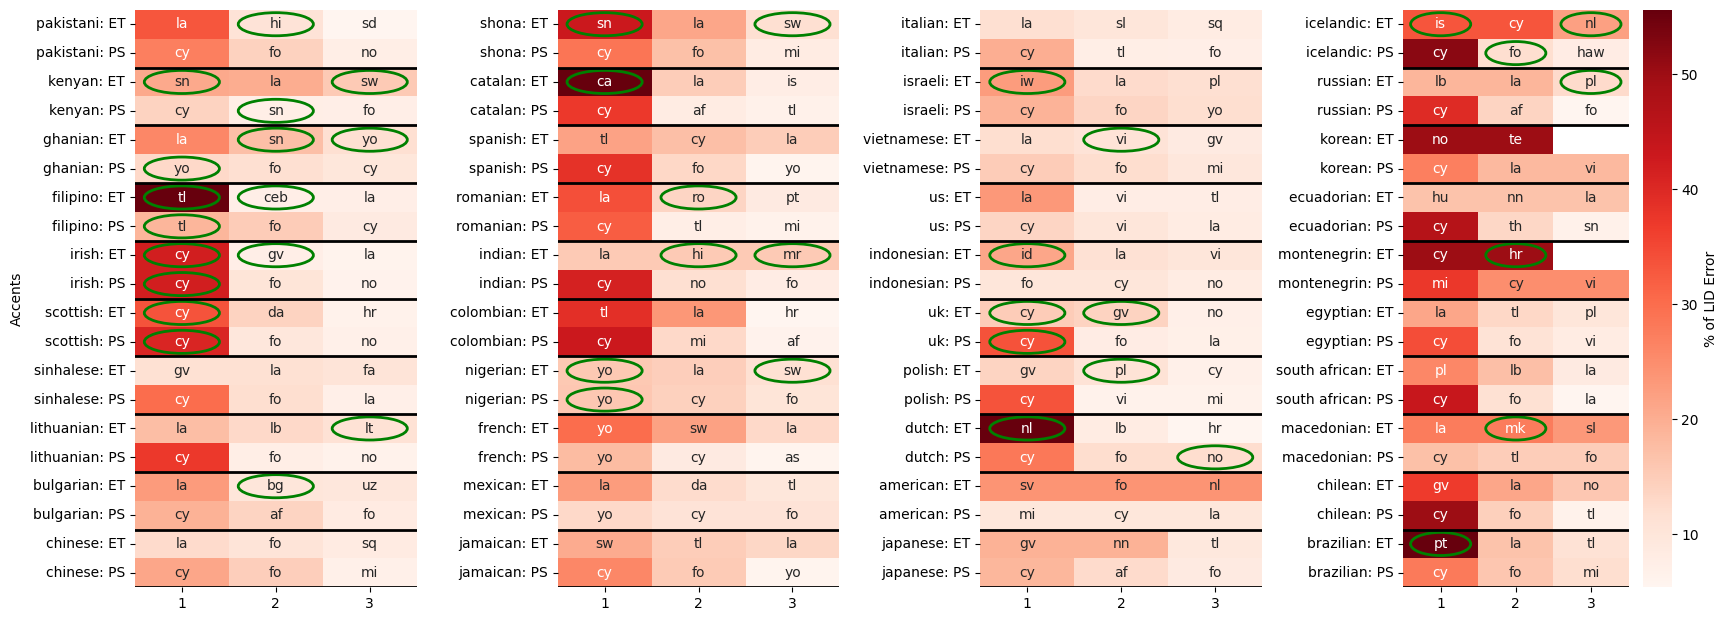

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


confusions_ET = {'scottish': [('cy', 43.8), ('da', 16.3), ('hr', 5.9)],
 'sinhalese': [('gv', 13.1), ('la', 13.1), ('fa', 11.5)],
 'lithuanian': [('la', 21.3), ('lb', 14.8), ('lt', 12.4)],
 'bulgarian': [('la', 29.1), ('bg', 10.8), ('uz', 10.3)],
 'chinese': [('la', 14.4), ('fo', 11.5), ('sq', 8.7)],
 'shona': [('sn', 38.9), ('la', 19.4), ('sw', 11.1)],
 'catalan': [('ca', 50.1), ('la', 13.9), ('is', 7.5)],
 'spanish': [('tl', 19.9), ('cy', 16.0), ('la', 13.9)],
 'romanian': [('la', 31.0), ('ro', 12.6), ('pt', 8.3)],
 'indian': [('la', 14.4), ('hi', 14.4), ('mr', 14.4)],
 'colombian': [('tl', 35.1), ('la', 21.6), ('hr', 5.4)],
 'nigerian': [('yo', 14.6), ('la', 13.7), ('sw', 10.9)],
 'french': [('yo', 27.3), ('sw', 20.2), ('la', 12.1)],
 'mexican': [('la', 20.9), ('da', 11.6), ('tl', 9.3)],
 'pakistani': [('la', 43.3), ('hi', 12.0), ('sd', 4.3)],
 'kenyan': [('sn', 26.0), ('la', 25.2), ('sw', 18.6)],
 'ghanian': [('la', 33.2), ('sn', 21.0), ('yo', 13.2)],
 'filipino': [('tl', 75.0), ('ceb', 7.1), ('la', 7.1)],
 'irish': [('cy', 55.7), ('gv', 7.2), ('la', 5.2)],
 'jamaican': [('sw', 18.8), ('tl', 13.9), ('la', 12.5)],
 'italian': [('la', 14.1), ('sl', 11.4), ('sq', 8.6)],
 'israeli': [('iw', 31.5), ('la', 15.4), ('pl', 14.1)],
 'vietnamese': [('la', 14.4), ('vi', 12.6), ('gv', 9.3)],
 'us': [('la', 32.4), ('vi', 8.1), ('tl', 8.1)],
 'indonesian': [('id', 29.0), ('la', 13.5), ('vi', 11.5)],
 'uk': [('cy', 19.4), ('gv', 17.5), ('no', 7.1)],
 'polish': [('gv', 17.4), ('pl', 13.0), ('cy', 6.5)],
 'dutch': [('nl', 82.6), ('lb', 8.7), ('hr', 4.3)],
 'american': [('sv', 33.3), ('fo', 33.3), ('nl', 33.3)],
 'japanese': [('gv', 26.3), ('nn', 26.3), ('tl', 10.5)],
 'icelandic': [('is', 33.3), ('cy', 33.3), ('nl', 22.2)],
 'russian': [('lb', 18.8), ('la', 18.8), ('pl', 12.5)],
 'korean': [('no', 50.0), ('te', 50.0)],
 'ecuadorian': [('hu', 16.7), ('nn', 16.7), ('la', 16.7)],
 'montenegrin': [('cy', 50.0), ('hr', 50.0)],
 'egyptian': [('la', 21.2), ('tl', 13.1), ('pl', 10.1)],
 'south african': [('pl', 25.9), ('lb', 17.2), ('la', 8.6)],
 'macedonian': [('la', 27.7), ('mk', 27.7), ('sl', 23.4)],
 'chilean': [('gv', 36.8), ('la', 21.1), ('no', 15.8)],
 'brazilian': [('pt', 55.6), ('la', 16.7), ('tl', 11.1)]}


confusions_PS = {'italian': [('cy', 27.1), ('tl', 7.9), ('fo', 7.5)],
 'lithuanian': [('cy', 49.1), ('fo', 7.4), ('no', 5.7)],
 'bulgarian': [('cy', 24.1), ('af', 15.9), ('fo', 8.7)],
 'korean': [('cy', 27.3), ('la', 18.2), ('vi', 18.2)],
 'uk': [('cy', 48.6), ('fo', 8.5), ('la', 6.8)],
 'chinese': [('cy', 26.6), ('fo', 17.4), ('mi', 6.4)],
 'ecuadorian': [('cy', 46.7), ('th', 13.3), ('sn', 6.7)],
 'romanian': [('cy', 29.2), ('tl', 7.4), ('mi', 6.4)],
 'indian': [('cy', 37.5), ('no', 11.0), ('fo', 7.7)],
 'pakistani': [('cy', 35.0), ('fo', 16.6), ('no', 7.6)],
 'polish': [('cy', 48.2), ('vi', 5.9), ('mi', 5.9)],
 'scottish': [('cy', 54.0), ('fo', 10.3), ('no', 6.3)],
 'sinhalese': [('cy', 39.0), ('fo', 13.6), ('la', 6.8)],
 'dutch': [('cy', 40.0), ('fo', 15.0), ('no', 15.0)],
 'american': [('mi', 11.1), ('cy', 11.1), ('la', 11.1)],
 'japanese': [('cy', 25.0), ('af', 15.6), ('fo', 9.4)],
 'icelandic': [('cy', 52.0), ('fo', 12.0), ('haw', 8.0)],
 'french': [('yo', 16.5), ('cy', 8.3), ('as', 5.8)],
 'shona': [('cy', 26.3), ('fo', 15.8), ('mi', 7.9)],
 'catalan': [('cy', 33.7), ('af', 7.9), ('tl', 6.5)],
 'spanish': [('cy', 34.8), ('fo', 12.3), ('yo', 5.8)],
 'russian': [('cy', 39.7), ('af', 13.7), ('fo', 5.5)],
 'colombian': [('cy', 38.8), ('mi', 12.2), ('af', 6.1)],
 'mexican': [('yo', 12.2), ('cy', 10.2), ('fo', 10.2)],
 'filipino': [('tl', 23.2), ('fo', 17.9), ('cy', 8.9)],
 'tagalog': [('cy', 83.3), ('mt', 16.7)],
 'nigerian': [('yo', 14.8), ('cy', 13.4), ('fo', 9.8)],
 'montenegrin': [('mi', 37.5), ('cy', 25.0), ('vi', 25.0)],
 'kenyan': [('cy', 16.4), ('sn', 7.4), ('fo', 7.3)],
 'ghanian': [('yo', 14.8), ('fo', 13.4), ('cy', 10.5)],
 'indonesian': [('fo', 11.6), ('cy', 11.6), ('no', 8.8)],
 'egyptian': [('cy', 34.4), ('fo', 10.9), ('vi', 8.3)],
 'south african': [('cy', 43.8), ('fo', 11.6), ('la', 5.4)],
 'macedonian': [('cy', 17.0), ('tl', 14.9), ('fo', 14.9)],
 'irish': [('cy', 55.9), ('fo', 11.3), ('no', 5.6)],
 'jamaican': [('cy', 23.7), ('fo', 14.2), ('yo', 5.9)],
 'chilean': [('cy', 50.0), ('fo', 14.5), ('tl', 6.5)],
 'brazilian': [('cy', 28.0), ('fo', 16.0), ('mi', 12.0)],
 'israeli': [('cy', 26.0), ('fo', 17.1), ('yo', 14.4)],
 'vietnamese': [('cy', 19.5), ('fo', 15.0), ('mi', 10.9)],
 'us': [('cy', 17.1), ('vi', 11.4), ('la', 8.6)]}

accent_language_map = {
    "pakistani": ["hi", "ur"],
    "kenyan": ["sw", "sn"],
    "ghanian": ["yo", "sn"],
    "filipino": ["tl", "ceb"],
    "irish": ["cy", "gv"],
    "scottish": ["cy", "gd"],
    "sinhalese": [],
    "lithuanian": ["lt", "lv"],
    "bulgarian": ["bg", "mk"],
    "chinese": ["zh", "yue"],
    "shona": ["sn", "sw"],
    "catalan": ["ca", "es"],
    "spanish": ["es", "ca"],
    "romanian": ["ro"],
    "indian": ["hi", "mr", "ta", "te"],
    "colombian": ["es", "qu"],
    "nigerian": ["yo", "sw"],
    "french": ["fr", "oc"],
    "mexican": ["es", "nah"],
    "jamaican": ["en", "jam"],
    "italian": ["it", "sc"],
    "israeli": ["iw", "ar"],
    "vietnamese": ["vi", "hmn"],
    "us": ["en", "es"],
    "indonesian": ["id", "jv"],
    "uk": ["gv", "cy"],
    "polish": ["pl", "cs"],
    "dutch": ["nl", "no"],
    "american": ["en", "es"],
    "japanese": ["ja", "ryu"],
    "icelandic": ["is", "nl", "fo"],
    "russian": ["ru", "pl"],
    "korean": ["ko", "zh"],
    "ecuadorian": ["es", "qu"],
    "montenegrin": ["hr"],
    "egyptian": ["ar", "cop"],
    "south african": ["af", "zu"],
    "macedonian": ["mk", "bg"],
    "chilean": ["es", "map"],
    "brazilian": ["pt", "tup"]
}

accents = accent_language_map.keys()
# Split accents into four groups
accent_groups = [list(accent_language_map.keys())[i:i+10] for i in range(0, len(accent_language_map), 10)]

fig, axes = plt.subplots(1, 4, figsize=(20, 7.5), sharey=False)
# Put space between subplots
plt.subplots_adjust(wspace=0.5)
cmap = sns.color_palette("Reds", as_cmap=True)

for idx, accents in enumerate(accent_groups):
    labels = []
    values = []
    row_labels = []
    
    for accent in accents:
        # Red heaptmap for ET, blue heatmap for PS
        labels.append([conf[0] for conf in confusions_ET[accent]])
        values.append([conf[1] for conf in confusions_ET[accent]])
        row_labels.append(f"{accent}: ET")
        
        labels.append([conf[0] for conf in confusions_PS[accent]])
        values.append([conf[1] for conf in confusions_PS[accent]])
        row_labels.append(f"{accent}: PS")
        
    
    df = pd.DataFrame(values, columns=["1", "2", "3"], index=row_labels)
    labels_df = pd.DataFrame(labels, columns=["1", "2", "3"], index=row_labels)

    cbar = idx == 3  # Only show color bar for the rightmost subfigure
    sns.heatmap(df, annot=labels_df, fmt="", cmap=cmap, ax=axes[idx], cbar=cbar, cbar_kws={'label': '% of LID Error'})

    # Create a new dataframe with the top 3 confusions for each accent
    ax = axes[idx]
    
    
    
    # Highlight accent-related languages and add thick black lines
    for i, accent in enumerate(row_labels):
        base_accent = accent[:-4]
        for j in range(3):
            if labels_df.iloc[i, j] in accent_language_map[base_accent]:
                ax.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))
        if i % 2 == 1:
            x_min, x_max = ax.get_xlim()
            ax.hlines(i + 1, x_min-10, x_max, colors='black', linewidth=2)  # Thick black line between accents
    
    # ax.set_xlabel("Top 3 Confusions")
    # ax.set_title(f"Group {idx+1}")
    ax.set_yticks(np.arange(len(row_labels)) + 0.5, labels=row_labels)
    # Set the labels for the yticks, 
    # They should show for each subplot 
    # ax.set_yticklabels(row_labels, rotation=0)
    # ax.legend(loc='upper left')
    
axes[0].set_ylabel("Accents")
# plt.suptitle("Accent Confusions in ET and PS (Split into 4 Parts)")
plt.show()


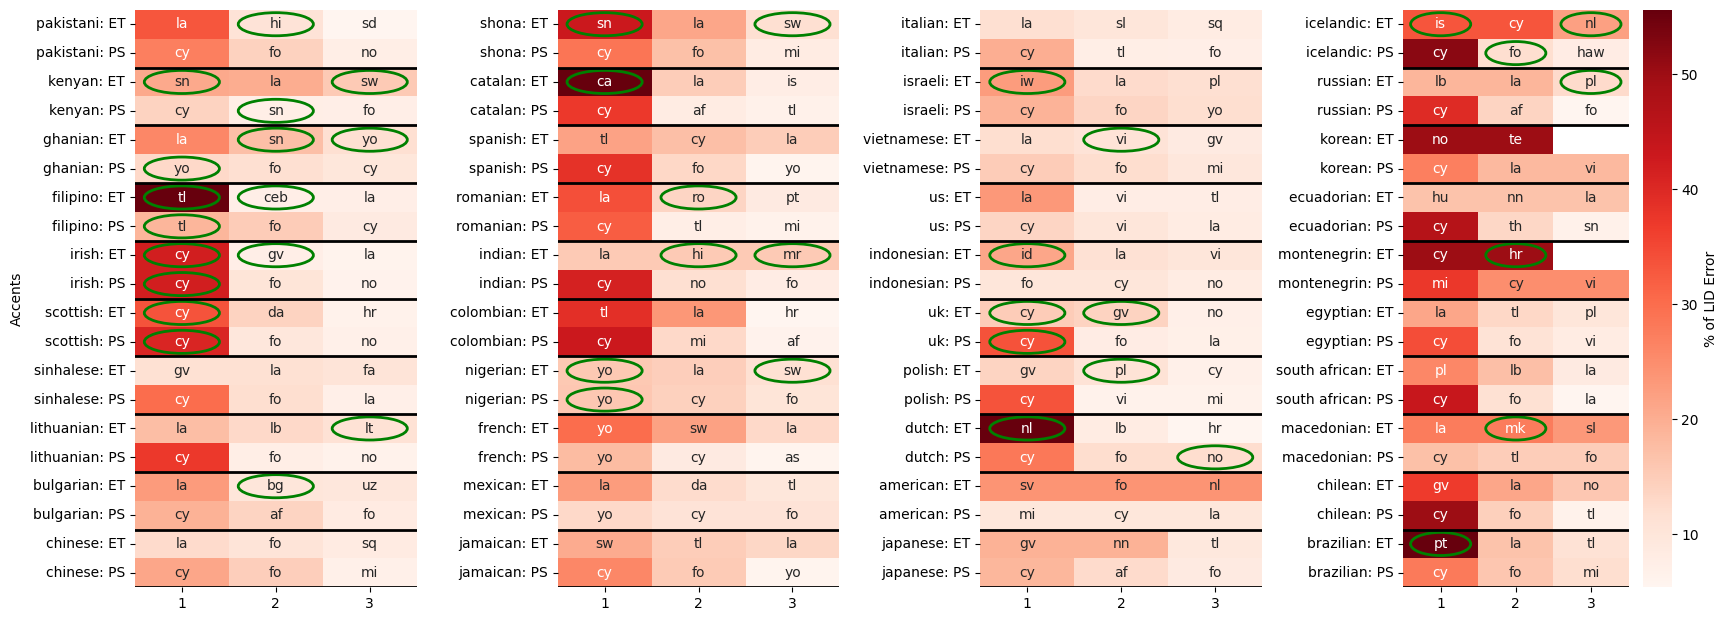

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


confusions_ET = {'scottish': [('cy', 43.8), ('da', 16.3), ('hr', 5.9)],
 'sinhalese': [('gv', 13.1), ('la', 13.1), ('fa', 11.5)],
 'lithuanian': [('la', 21.3), ('lb', 14.8), ('lt', 12.4)],
 'bulgarian': [('la', 29.1), ('bg', 10.8), ('uz', 10.3)],
 'chinese': [('la', 14.4), ('fo', 11.5), ('sq', 8.7)],
 'shona': [('sn', 38.9), ('la', 19.4), ('sw', 11.1)],
 'catalan': [('ca', 50.1), ('la', 13.9), ('is', 7.5)],
 'spanish': [('tl', 19.9), ('cy', 16.0), ('la', 13.9)],
 'romanian': [('la', 31.0), ('ro', 12.6), ('pt', 8.3)],
 'indian': [('la', 14.4), ('hi', 14.4), ('mr', 14.4)],
 'colombian': [('tl', 35.1), ('la', 21.6), ('hr', 5.4)],
 'nigerian': [('yo', 14.6), ('la', 13.7), ('sw', 10.9)],
 'french': [('yo', 27.3), ('sw', 20.2), ('la', 12.1)],
 'mexican': [('la', 20.9), ('da', 11.6), ('tl', 9.3)],
 'pakistani': [('la', 43.3), ('hi', 12.0), ('sd', 4.3)],
 'kenyan': [('sn', 26.0), ('la', 25.2), ('sw', 18.6)],
 'ghanian': [('la', 33.2), ('sn', 21.0), ('yo', 13.2)],
 'filipino': [('tl', 75.0), ('ceb', 7.1), ('la', 7.1)],
 'irish': [('cy', 55.7), ('gv', 7.2), ('la', 5.2)],
 'jamaican': [('sw', 18.8), ('tl', 13.9), ('la', 12.5)],
 'italian': [('la', 14.1), ('sl', 11.4), ('sq', 8.6)],
 'israeli': [('iw', 31.5), ('la', 15.4), ('pl', 14.1)],
 'vietnamese': [('la', 14.4), ('vi', 12.6), ('gv', 9.3)],
 'us': [('la', 32.4), ('vi', 8.1), ('tl', 8.1)],
 'indonesian': [('id', 29.0), ('la', 13.5), ('vi', 11.5)],
 'uk': [('cy', 19.4), ('gv', 17.5), ('no', 7.1)],
 'polish': [('gv', 17.4), ('pl', 13.0), ('cy', 6.5)],
 'dutch': [('nl', 82.6), ('lb', 8.7), ('hr', 4.3)],
 'american': [('sv', 33.3), ('fo', 33.3), ('nl', 33.3)],
 'japanese': [('gv', 26.3), ('nn', 26.3), ('tl', 10.5)],
 'icelandic': [('is', 33.3), ('cy', 33.3), ('nl', 22.2)],
 'russian': [('lb', 18.8), ('la', 18.8), ('pl', 12.5)],
 'korean': [('no', 50.0), ('te', 50.0)],
 'ecuadorian': [('hu', 16.7), ('nn', 16.7), ('la', 16.7)],
 'montenegrin': [('cy', 50.0), ('hr', 50.0)],
 'egyptian': [('la', 21.2), ('tl', 13.1), ('pl', 10.1)],
 'south african': [('pl', 25.9), ('lb', 17.2), ('la', 8.6)],
 'macedonian': [('la', 27.7), ('mk', 27.7), ('sl', 23.4)],
 'chilean': [('gv', 36.8), ('la', 21.1), ('no', 15.8)],
 'brazilian': [('pt', 55.6), ('la', 16.7), ('tl', 11.1)]}


confusions_PS = {'italian': [('cy', 27.1), ('tl', 7.9), ('fo', 7.5)],
 'lithuanian': [('cy', 49.1), ('fo', 7.4), ('no', 5.7)],
 'bulgarian': [('cy', 24.1), ('af', 15.9), ('fo', 8.7)],
 'korean': [('cy', 27.3), ('la', 18.2), ('vi', 18.2)],
 'uk': [('cy', 48.6), ('fo', 8.5), ('la', 6.8)],
 'chinese': [('cy', 26.6), ('fo', 17.4), ('mi', 6.4)],
 'ecuadorian': [('cy', 46.7), ('th', 13.3), ('sn', 6.7)],
 'romanian': [('cy', 29.2), ('tl', 7.4), ('mi', 6.4)],
 'indian': [('cy', 37.5), ('no', 11.0), ('fo', 7.7)],
 'pakistani': [('cy', 35.0), ('fo', 16.6), ('no', 7.6)],
 'polish': [('cy', 48.2), ('vi', 5.9), ('mi', 5.9)],
 'scottish': [('cy', 54.0), ('fo', 10.3), ('no', 6.3)],
 'sinhalese': [('cy', 39.0), ('fo', 13.6), ('la', 6.8)],
 'dutch': [('cy', 40.0), ('fo', 15.0), ('no', 15.0)],
 'american': [('mi', 11.1), ('cy', 11.1), ('la', 11.1)],
 'japanese': [('cy', 25.0), ('af', 15.6), ('fo', 9.4)],
 'icelandic': [('cy', 52.0), ('fo', 12.0), ('haw', 8.0)],
 'french': [('yo', 16.5), ('cy', 8.3), ('as', 5.8)],
 'shona': [('cy', 26.3), ('fo', 15.8), ('mi', 7.9)],
 'catalan': [('cy', 33.7), ('af', 7.9), ('tl', 6.5)],
 'spanish': [('cy', 34.8), ('fo', 12.3), ('yo', 5.8)],
 'russian': [('cy', 39.7), ('af', 13.7), ('fo', 5.5)],
 'colombian': [('cy', 38.8), ('mi', 12.2), ('af', 6.1)],
 'mexican': [('yo', 12.2), ('cy', 10.2), ('fo', 10.2)],
 'filipino': [('tl', 23.2), ('fo', 17.9), ('cy', 8.9)],
 'tagalog': [('cy', 83.3), ('mt', 16.7)],
 'nigerian': [('yo', 14.8), ('cy', 13.4), ('fo', 9.8)],
 'montenegrin': [('mi', 37.5), ('cy', 25.0), ('vi', 25.0)],
 'kenyan': [('cy', 16.4), ('sn', 7.4), ('fo', 7.3)],
 'ghanian': [('yo', 14.8), ('fo', 13.4), ('cy', 10.5)],
 'indonesian': [('fo', 11.6), ('cy', 11.6), ('no', 8.8)],
 'egyptian': [('cy', 34.4), ('fo', 10.9), ('vi', 8.3)],
 'south african': [('cy', 43.8), ('fo', 11.6), ('la', 5.4)],
 'macedonian': [('cy', 17.0), ('tl', 14.9), ('fo', 14.9)],
 'irish': [('cy', 55.9), ('fo', 11.3), ('no', 5.6)],
 'jamaican': [('cy', 23.7), ('fo', 14.2), ('yo', 5.9)],
 'chilean': [('cy', 50.0), ('fo', 14.5), ('tl', 6.5)],
 'brazilian': [('cy', 28.0), ('fo', 16.0), ('mi', 12.0)],
 'israeli': [('cy', 26.0), ('fo', 17.1), ('yo', 14.4)],
 'vietnamese': [('cy', 19.5), ('fo', 15.0), ('mi', 10.9)],
 'us': [('cy', 17.1), ('vi', 11.4), ('la', 8.6)]}

accent_language_map = {
    "pakistani": ["hi", "ur"],
    "kenyan": ["sw", "sn"],
    "ghanian": ["yo", "sn"],
    "filipino": ["tl", "ceb"],
    "irish": ["cy", "gv"],
    "scottish": ["cy", "gd"],
    "sinhalese": [],
    "lithuanian": ["lt", "lv"],
    "bulgarian": ["bg", "mk"],
    "chinese": ["zh", "yue"],
    "shona": ["sn", "sw"],
    "catalan": ["ca", "es"],
    "spanish": ["es", "ca"],
    "romanian": ["ro"],
    "indian": ["hi", "mr", "ta", "te"],
    "colombian": ["es", "qu"],
    "nigerian": ["yo", "sw"],
    "french": ["fr", "oc"],
    "mexican": ["es", "nah"],
    "jamaican": ["en", "jam"],
    "italian": ["it", "sc"],
    "israeli": ["iw", "ar"],
    "vietnamese": ["vi", "hmn"],
    "us": ["en", "es"],
    "indonesian": ["id", "jv"],
    "uk": ["gv", "cy"],
    "polish": ["pl", "cs"],
    "dutch": ["nl", "no"],
    "american": ["en", "es"],
    "japanese": ["ja", "ryu"],
    "icelandic": ["is", "nl", "fo"],
    "russian": ["ru", "pl"],
    "korean": ["ko", "zh"],
    "ecuadorian": ["es", "qu"],
    "montenegrin": ["hr"],
    "egyptian": ["ar", "cop"],
    "south african": ["af", "zu"],
    "macedonian": ["mk", "bg"],
    "chilean": ["es", "map"],
    "brazilian": ["pt", "tup"]
}

accents = accent_language_map.keys()
# Split accents into four groups
accent_groups = [list(accent_language_map.keys())[i:i+10] for i in range(0, len(accent_language_map), 10)]

fig, axes = plt.subplots(1, 4, figsize=(20, 7.5), sharey=False)
# Put space between subplots
plt.subplots_adjust(wspace=0.5)
cmap = sns.color_palette("Reds", as_cmap=True)

for idx, accents in enumerate(accent_groups):
    labels = []
    values = []
    row_labels = []
    
    for accent in accents:
        # Red heaptmap for ET, blue heatmap for PS
        labels.append([conf[0] for conf in confusions_ET[accent]])
        values.append([conf[1] for conf in confusions_ET[accent]])
        row_labels.append(f"{accent}: ET")
        
        labels.append([conf[0] for conf in confusions_PS[accent]])
        values.append([conf[1] for conf in confusions_PS[accent]])
        row_labels.append(f"{accent}: PS")
        
    
    df = pd.DataFrame(values, columns=["1", "2", "3"], index=row_labels)
    labels_df = pd.DataFrame(labels, columns=["1", "2", "3"], index=row_labels)

    cbar = idx == 3  # Only show color bar for the rightmost subfigure
    sns.heatmap(df, annot=labels_df, fmt="", cmap=cmap, ax=axes[idx], cbar=cbar, cbar_kws={'label': '% of LID Error'})

    # Create a new dataframe with the top 3 confusions for each accent
    ax = axes[idx]
    
    
    
    # Highlight accent-related languages and add thick black lines
    for i, accent in enumerate(row_labels):
        base_accent = accent[:-4]
        for j in range(3):
            if labels_df.iloc[i, j] in accent_language_map[base_accent]:
                ax.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))
        if i % 2 == 1:
            x_min, x_max = ax.get_xlim()
            ax.hlines(i + 1, x_min-10, x_max, colors='black', linewidth=2)  # Thick black line between accents
    
    # ax.set_xlabel("Top 3 Confusions")
    # ax.set_title(f"Group {idx+1}")
    ax.set_yticks(np.arange(len(row_labels)) + 0.5, labels=row_labels)
    # Set the labels for the yticks, 
    # They should show for each subplot 
    # ax.set_yticklabels(row_labels, rotation=0)
    # ax.legend(loc='upper left')
    
axes[0].set_ylabel("Accents")
# plt.suptitle("Accent Confusions in ET and PS (Split into 4 Parts)")
plt.show()


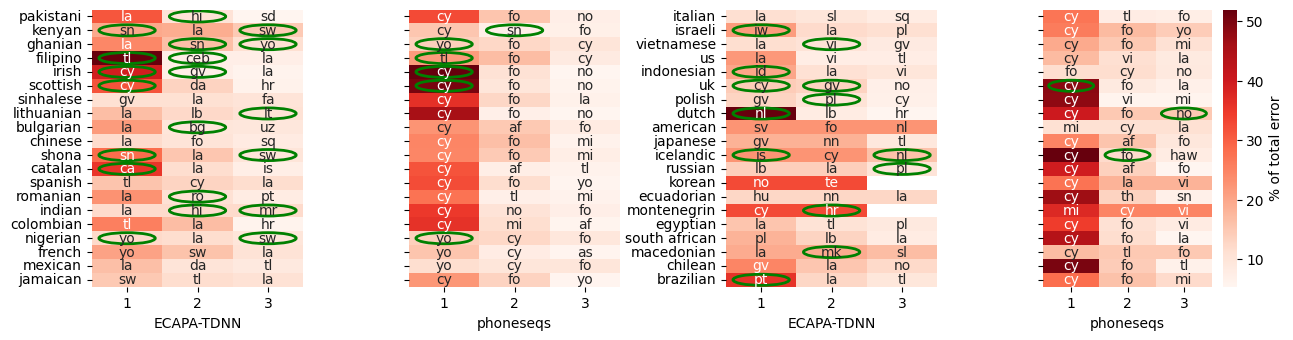

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

confusions_ET = {'scottish': [('cy', 43.8), ('da', 16.3), ('hr', 5.9)],
 'sinhalese': [('gv', 13.1), ('la', 13.1), ('fa', 11.5)],
 'lithuanian': [('la', 21.3), ('lb', 14.8), ('lt', 12.4)],
 'bulgarian': [('la', 29.1), ('bg', 10.8), ('uz', 10.3)],
 'chinese': [('la', 14.4), ('fo', 11.5), ('sq', 8.7)],
 'shona': [('sn', 38.9), ('la', 19.4), ('sw', 11.1)],
 'catalan': [('ca', 50.1), ('la', 13.9), ('is', 7.5)],
 'spanish': [('tl', 19.9), ('cy', 16.0), ('la', 13.9)],
 'romanian': [('la', 31.0), ('ro', 12.6), ('pt', 8.3)],
 'indian': [('la', 14.4), ('hi', 14.4), ('mr', 14.4)],
 'colombian': [('tl', 35.1), ('la', 21.6), ('hr', 5.4)],
 'nigerian': [('yo', 14.6), ('la', 13.7), ('sw', 10.9)],
 'french': [('yo', 27.3), ('sw', 20.2), ('la', 12.1)],
 'mexican': [('la', 20.9), ('da', 11.6), ('tl', 9.3)],
 'pakistani': [('la', 43.3), ('hi', 12.0), ('sd', 4.3)],
 'kenyan': [('sn', 26.0), ('la', 25.2), ('sw', 18.6)],
 'ghanian': [('la', 33.2), ('sn', 21.0), ('yo', 13.2)],
 'filipino': [('tl', 75.0), ('ceb', 7.1), ('la', 7.1)],
 'irish': [('cy', 55.7), ('gv', 7.2), ('la', 5.2)],
 'jamaican': [('sw', 18.8), ('tl', 13.9), ('la', 12.5)],
 'italian': [('la', 14.1), ('sl', 11.4), ('sq', 8.6)],
 'israeli': [('iw', 31.5), ('la', 15.4), ('pl', 14.1)],
 'vietnamese': [('la', 14.4), ('vi', 12.6), ('gv', 9.3)],
 'us': [('la', 32.4), ('vi', 8.1), ('tl', 8.1)],
 'indonesian': [('id', 29.0), ('la', 13.5), ('vi', 11.5)],
 'uk': [('cy', 19.4), ('gv', 17.5), ('no', 7.1)],
 'polish': [('gv', 17.4), ('pl', 13.0), ('cy', 6.5)],
 'dutch': [('nl', 82.6), ('lb', 8.7), ('hr', 4.3)],
 'american': [('sv', 33.3), ('fo', 33.3), ('nl', 33.3)],
 'japanese': [('gv', 26.3), ('nn', 26.3), ('tl', 10.5)],
 'icelandic': [('is', 33.3), ('cy', 33.3), ('nl', 22.2)],
 'russian': [('lb', 18.8), ('la', 18.8), ('pl', 12.5)],
 'korean': [('no', 50.0), ('te', 50.0)],
 'ecuadorian': [('hu', 16.7), ('nn', 16.7), ('la', 16.7)],
 'montenegrin': [('cy', 50.0), ('hr', 50.0)],
 'egyptian': [('la', 21.2), ('tl', 13.1), ('pl', 10.1)],
 'south african': [('pl', 25.9), ('lb', 17.2), ('la', 8.6)],
 'macedonian': [('la', 27.7), ('mk', 27.7), ('sl', 23.4)],
 'chilean': [('gv', 36.8), ('la', 21.1), ('no', 15.8)],
 'brazilian': [('pt', 55.6), ('la', 16.7), ('tl', 11.1)]}


confusions_PS = {'italian': [('cy', 27.1), ('tl', 7.9), ('fo', 7.5)],
 'lithuanian': [('cy', 49.1), ('fo', 7.4), ('no', 5.7)],
 'bulgarian': [('cy', 24.1), ('af', 15.9), ('fo', 8.7)],
 'korean': [('cy', 27.3), ('la', 18.2), ('vi', 18.2)],
 'uk': [('cy', 48.6), ('fo', 8.5), ('la', 6.8)],
 'chinese': [('cy', 26.6), ('fo', 17.4), ('mi', 6.4)],
 'ecuadorian': [('cy', 46.7), ('th', 13.3), ('sn', 6.7)],
 'romanian': [('cy', 29.2), ('tl', 7.4), ('mi', 6.4)],
 'indian': [('cy', 37.5), ('no', 11.0), ('fo', 7.7)],
 'pakistani': [('cy', 35.0), ('fo', 16.6), ('no', 7.6)],
 'polish': [('cy', 48.2), ('vi', 5.9), ('mi', 5.9)],
 'scottish': [('cy', 54.0), ('fo', 10.3), ('no', 6.3)],
 'sinhalese': [('cy', 39.0), ('fo', 13.6), ('la', 6.8)],
 'dutch': [('cy', 40.0), ('fo', 15.0), ('no', 15.0)],
 'american': [('mi', 11.1), ('cy', 11.1), ('la', 11.1)],
 'japanese': [('cy', 25.0), ('af', 15.6), ('fo', 9.4)],
 'icelandic': [('cy', 52.0), ('fo', 12.0), ('haw', 8.0)],
 'french': [('yo', 16.5), ('cy', 8.3), ('as', 5.8)],
 'shona': [('cy', 26.3), ('fo', 15.8), ('mi', 7.9)],
 'catalan': [('cy', 33.7), ('af', 7.9), ('tl', 6.5)],
 'spanish': [('cy', 34.8), ('fo', 12.3), ('yo', 5.8)],
 'russian': [('cy', 39.7), ('af', 13.7), ('fo', 5.5)],
 'colombian': [('cy', 38.8), ('mi', 12.2), ('af', 6.1)],
 'mexican': [('yo', 12.2), ('cy', 10.2), ('fo', 10.2)],
 'filipino': [('tl', 23.2), ('fo', 17.9), ('cy', 8.9)],
 'tagalog': [('cy', 83.3), ('mt', 16.7)],
 'nigerian': [('yo', 14.8), ('cy', 13.4), ('fo', 9.8)],
 'montenegrin': [('mi', 37.5), ('cy', 25.0), ('vi', 25.0)],
 'kenyan': [('cy', 16.4), ('sn', 7.4), ('fo', 7.3)],
 'ghanian': [('yo', 14.8), ('fo', 13.4), ('cy', 10.5)],
 'indonesian': [('fo', 11.6), ('cy', 11.6), ('no', 8.8)],
 'egyptian': [('cy', 34.4), ('fo', 10.9), ('vi', 8.3)],
 'south african': [('cy', 43.8), ('fo', 11.6), ('la', 5.4)],
 'macedonian': [('cy', 17.0), ('tl', 14.9), ('fo', 14.9)],
 'irish': [('cy', 55.9), ('fo', 11.3), ('no', 5.6)],
 'jamaican': [('cy', 23.7), ('fo', 14.2), ('yo', 5.9)],
 'chilean': [('cy', 50.0), ('fo', 14.5), ('tl', 6.5)],
 'brazilian': [('cy', 28.0), ('fo', 16.0), ('mi', 12.0)],
 'israeli': [('cy', 26.0), ('fo', 17.1), ('yo', 14.4)],
 'vietnamese': [('cy', 19.5), ('fo', 15.0), ('mi', 10.9)],
 'us': [('cy', 17.1), ('vi', 11.4), ('la', 8.6)]}

accent_language_map = {
    "pakistani": ["hi", "ur"],
    "kenyan": ["sw", "sn"],
    "ghanian": ["yo", "sn"],
    "filipino": ["tl", "ceb"],
    "irish": ["cy", "gv"],
    "scottish": ["cy", "gd"],
    "sinhalese": [],
    "lithuanian": ["lt", "lv"],
    "bulgarian": ["bg", "mk"],
    "chinese": ["zh", "yue"],
    "shona": ["sn", "sw"],
    "catalan": ["ca", "es"],
    "spanish": ["es", "ca"],
    "romanian": ["ro"],
    "indian": ["hi", "mr", "ta", "te"],
    "colombian": ["es", "qu"],
    "nigerian": ["yo", "sw"],
    "french": ["fr", "oc"],
    "mexican": ["es", "nah"],
    "jamaican": ["en", "jam"],
    "italian": ["it", "sc"],
    "israeli": ["iw", "ar"],
    "vietnamese": ["vi", "hmn"],
    "us": ["en", "es"],
    "indonesian": ["id", "jv"],
    "uk": ["gv", "cy"],
    "polish": ["pl", "cs"],
    "dutch": ["nl", "no"],
    "american": ["en", "es"],
    "japanese": ["ja", "ryu"],
    "icelandic": ["is", "nl", "fo"],
    "russian": ["ru", "pl"],
    "korean": ["ko", "zh"],
    "ecuadorian": ["es", "qu"],
    "montenegrin": ["hr"],
    "egyptian": ["ar", "cop"],
    "south african": ["af", "zu"],
    "macedonian": ["mk", "bg"],
    "chilean": ["es", "map"],
    "brazilian": ["pt", "tup"]
}



# Your data (confusions_ET, confusions_PS, accent_language_map) remains the same

accent_groups = [list(accent_language_map.keys())[i:i+20] for i in range(0, len(accent_language_map), 20)]
accents = accent_language_map.keys()

# Create subplots with 2 columns (one for ET and one for PS)
fig, axes = plt.subplots(1, 4, figsize=(15, 3.6), sharey=False)

# Put space between subplots
# plt.subplots_adjust(wspace=0.5)
# Put space between subplot 2 and 3
plt.subplots_adjust(wspace=0.5)
# Make subplot 0 and 2 wider

# axes[0].set_position([0.1, 0.1, 0.4, 0.8])
# axes[2].set_position([0.5, 0.1, 0.4, 0.8])

# Put thick black line between subplot 2 and 3

# axes[2].vlines(x=axes[1].get_xlim()[0] - 3, ymin=axes[1].get_ylim()[0], ymax=axes[1].get_ylim()[1], color='black', linewidth=2)
# axes[1].plot([axes[1].get_xlim()[1], axes[1].get_xlim()[1]], [axes[1].get_ylim()[0], axes[1].get_ylim()[1]], color='black', linewidth=2)



cmap = sns.color_palette("Reds", as_cmap=True)

for idx, accents in enumerate(accent_groups):

    # print("idx", idx)
    labels_et = []
    values_et = []
    row_labels_et = []

    labels_ps = []
    values_ps = []
    row_labels_ps = []

    for accent in accents:
        # For ET
        labels_et.append([conf[0] for conf in confusions_ET[accent]])
        values_et.append([conf[1] for conf in confusions_ET[accent]])
        row_labels_et.append(f"{accent}")

        # For PS
        labels_ps.append([conf[0] for conf in confusions_PS[accent]])
        values_ps.append([conf[1] for conf in confusions_PS[accent]])
        row_labels_ps.append(f"{accent}")

    # DataFrames for ET and PS
    df_et = pd.DataFrame(values_et, columns=["1", "2", "3"], index=row_labels_et)
    labels_df_et = pd.DataFrame(labels_et, columns=["1", "2", "3"], index=row_labels_et)

    df_ps = pd.DataFrame(values_ps, columns=["1", "2", "3"])
    labels_df_ps = pd.DataFrame(labels_ps, columns=["1", "2", "3"])

    # ET heatmap (left column)
    ax_et = axes[idx*2]
    cbar = False  # No color bar for ET
    sns.heatmap(df_et, annot=labels_df_et, fmt="", cmap=cmap, ax=ax_et, cbar=cbar)
    ax_et.set_xlabel(f"ECAPA-TDNN")

    # PS heatmap (right column)
    ax_ps = axes[idx*2+ 1]
    cbar = idx*2+ 1 == 3  # Only show color bar for the rightmost subfigure
    sns.heatmap(df_ps, annot=labels_df_ps, fmt="", cmap=cmap, ax=ax_ps, cbar=cbar, cbar_kws={'label': '% of total error'})
    ax_ps.set_xlabel(f"phoneseqs")

    # Highlight accent-related languages and add thick black lines for both ET and PS
    for i, accent in enumerate(row_labels_et):
        base_accent = accent  # Remove "ET" or "PS" part
        for j in range(3):
            if labels_df_et.iloc[i, j] in accent_language_map[base_accent]:
                ax_et.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))

        # if i % 2 == 1:
        #     x_min, x_max = ax_et.get_xlim()
        #     ax_et.hlines(i + 1, x_min-10, x_max, colors='black', linewidth=2)  # Thick black line for ET

        # Repeat for PS (right column)
        for j in range(3):
            if labels_df_ps.iloc[i, j] in accent_language_map[base_accent]:
                ax_ps.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))

        # if i % 2 == 1:
        #     x_min, x_max = ax_ps.get_xlim()
        #     ax_ps.hlines(i + 1, x_min-10, x_max, colors='black', linewidth=2)  # Thick black line for PS

    # Set the labels for the yticks, which show for each subplot
    ax_et.set_yticks(np.arange(len(row_labels_et)) + 0.5, labels=row_labels_et)
    # Set empty yticks for PS
    ax_ps.set_yticks(np.arange(len(row_labels_ps)) + 0.5, labels=["" for _ in range(len(row_labels_ps))])

# Set the common y-label for all subplots
# axes[0, 0].set_ylabel("Accents")
# axes[0, 1].set_ylabel("Accents")

plt.savefig("accent_confusions.pdf", bbox_inches='tight')


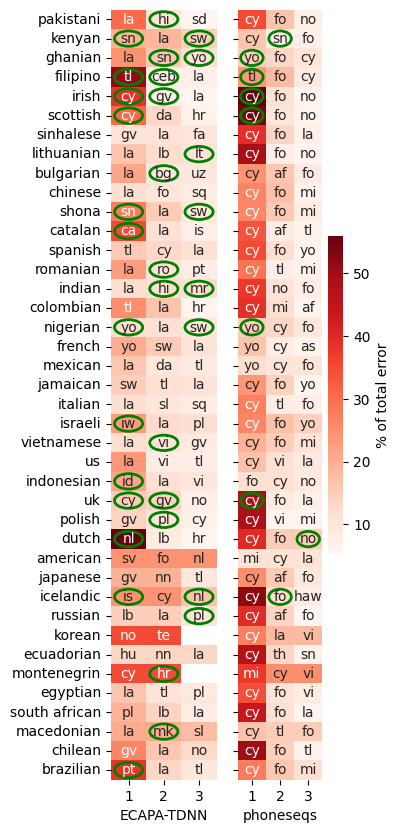

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

confusions_ET = {'scottish': [('cy', 43.8), ('da', 16.3), ('hr', 5.9)],
 'sinhalese': [('gv', 13.1), ('la', 13.1), ('fa', 11.5)],
 'lithuanian': [('la', 21.3), ('lb', 14.8), ('lt', 12.4)],
 'bulgarian': [('la', 29.1), ('bg', 10.8), ('uz', 10.3)],
 'chinese': [('la', 14.4), ('fo', 11.5), ('sq', 8.7)],
 'shona': [('sn', 38.9), ('la', 19.4), ('sw', 11.1)],
 'catalan': [('ca', 50.1), ('la', 13.9), ('is', 7.5)],
 'spanish': [('tl', 19.9), ('cy', 16.0), ('la', 13.9)],
 'romanian': [('la', 31.0), ('ro', 12.6), ('pt', 8.3)],
 'indian': [('la', 14.4), ('hi', 14.4), ('mr', 14.4)],
 'colombian': [('tl', 35.1), ('la', 21.6), ('hr', 5.4)],
 'nigerian': [('yo', 14.6), ('la', 13.7), ('sw', 10.9)],
 'french': [('yo', 27.3), ('sw', 20.2), ('la', 12.1)],
 'mexican': [('la', 20.9), ('da', 11.6), ('tl', 9.3)],
 'pakistani': [('la', 43.3), ('hi', 12.0), ('sd', 4.3)],
 'kenyan': [('sn', 26.0), ('la', 25.2), ('sw', 18.6)],
 'ghanian': [('la', 33.2), ('sn', 21.0), ('yo', 13.2)],
 'filipino': [('tl', 75.0), ('ceb', 7.1), ('la', 7.1)],
 'irish': [('cy', 55.7), ('gv', 7.2), ('la', 5.2)],
 'jamaican': [('sw', 18.8), ('tl', 13.9), ('la', 12.5)],
 'italian': [('la', 14.1), ('sl', 11.4), ('sq', 8.6)],
 'israeli': [('iw', 31.5), ('la', 15.4), ('pl', 14.1)],
 'vietnamese': [('la', 14.4), ('vi', 12.6), ('gv', 9.3)],
 'us': [('la', 32.4), ('vi', 8.1), ('tl', 8.1)],
 'indonesian': [('id', 29.0), ('la', 13.5), ('vi', 11.5)],
 'uk': [('cy', 19.4), ('gv', 17.5), ('no', 7.1)],
 'polish': [('gv', 17.4), ('pl', 13.0), ('cy', 6.5)],
 'dutch': [('nl', 82.6), ('lb', 8.7), ('hr', 4.3)],
 'american': [('sv', 33.3), ('fo', 33.3), ('nl', 33.3)],
 'japanese': [('gv', 26.3), ('nn', 26.3), ('tl', 10.5)],
 'icelandic': [('is', 33.3), ('cy', 33.3), ('nl', 22.2)],
 'russian': [('lb', 18.8), ('la', 18.8), ('pl', 12.5)],
 'korean': [('no', 50.0), ('te', 50.0)],
 'ecuadorian': [('hu', 16.7), ('nn', 16.7), ('la', 16.7)],
 'montenegrin': [('cy', 50.0), ('hr', 50.0)],
 'egyptian': [('la', 21.2), ('tl', 13.1), ('pl', 10.1)],
 'south african': [('pl', 25.9), ('lb', 17.2), ('la', 8.6)],
 'macedonian': [('la', 27.7), ('mk', 27.7), ('sl', 23.4)],
 'chilean': [('gv', 36.8), ('la', 21.1), ('no', 15.8)],
 'brazilian': [('pt', 55.6), ('la', 16.7), ('tl', 11.1)]}


confusions_PS = {'italian': [('cy', 27.1), ('tl', 7.9), ('fo', 7.5)],
 'lithuanian': [('cy', 49.1), ('fo', 7.4), ('no', 5.7)],
 'bulgarian': [('cy', 24.1), ('af', 15.9), ('fo', 8.7)],
 'korean': [('cy', 27.3), ('la', 18.2), ('vi', 18.2)],
 'uk': [('cy', 48.6), ('fo', 8.5), ('la', 6.8)],
 'chinese': [('cy', 26.6), ('fo', 17.4), ('mi', 6.4)],
 'ecuadorian': [('cy', 46.7), ('th', 13.3), ('sn', 6.7)],
 'romanian': [('cy', 29.2), ('tl', 7.4), ('mi', 6.4)],
 'indian': [('cy', 37.5), ('no', 11.0), ('fo', 7.7)],
 'pakistani': [('cy', 35.0), ('fo', 16.6), ('no', 7.6)],
 'polish': [('cy', 48.2), ('vi', 5.9), ('mi', 5.9)],
 'scottish': [('cy', 54.0), ('fo', 10.3), ('no', 6.3)],
 'sinhalese': [('cy', 39.0), ('fo', 13.6), ('la', 6.8)],
 'dutch': [('cy', 40.0), ('fo', 15.0), ('no', 15.0)],
 'american': [('mi', 11.1), ('cy', 11.1), ('la', 11.1)],
 'japanese': [('cy', 25.0), ('af', 15.6), ('fo', 9.4)],
 'icelandic': [('cy', 52.0), ('fo', 12.0), ('haw', 8.0)],
 'french': [('yo', 16.5), ('cy', 8.3), ('as', 5.8)],
 'shona': [('cy', 26.3), ('fo', 15.8), ('mi', 7.9)],
 'catalan': [('cy', 33.7), ('af', 7.9), ('tl', 6.5)],
 'spanish': [('cy', 34.8), ('fo', 12.3), ('yo', 5.8)],
 'russian': [('cy', 39.7), ('af', 13.7), ('fo', 5.5)],
 'colombian': [('cy', 38.8), ('mi', 12.2), ('af', 6.1)],
 'mexican': [('yo', 12.2), ('cy', 10.2), ('fo', 10.2)],
 'filipino': [('tl', 23.2), ('fo', 17.9), ('cy', 8.9)],
 'tagalog': [('cy', 83.3), ('mt', 16.7)],
 'nigerian': [('yo', 14.8), ('cy', 13.4), ('fo', 9.8)],
 'montenegrin': [('mi', 37.5), ('cy', 25.0), ('vi', 25.0)],
 'kenyan': [('cy', 16.4), ('sn', 7.4), ('fo', 7.3)],
 'ghanian': [('yo', 14.8), ('fo', 13.4), ('cy', 10.5)],
 'indonesian': [('fo', 11.6), ('cy', 11.6), ('no', 8.8)],
 'egyptian': [('cy', 34.4), ('fo', 10.9), ('vi', 8.3)],
 'south african': [('cy', 43.8), ('fo', 11.6), ('la', 5.4)],
 'macedonian': [('cy', 17.0), ('tl', 14.9), ('fo', 14.9)],
 'irish': [('cy', 55.9), ('fo', 11.3), ('no', 5.6)],
 'jamaican': [('cy', 23.7), ('fo', 14.2), ('yo', 5.9)],
 'chilean': [('cy', 50.0), ('fo', 14.5), ('tl', 6.5)],
 'brazilian': [('cy', 28.0), ('fo', 16.0), ('mi', 12.0)],
 'israeli': [('cy', 26.0), ('fo', 17.1), ('yo', 14.4)],
 'vietnamese': [('cy', 19.5), ('fo', 15.0), ('mi', 10.9)],
 'us': [('cy', 17.1), ('vi', 11.4), ('la', 8.6)]}

accent_language_map = {
    "pakistani": ["hi", "ur"],
    "kenyan": ["sw", "sn"],
    "ghanian": ["yo", "sn"],
    "filipino": ["tl", "ceb"],
    "irish": ["cy", "gv"],
    "scottish": ["cy", "gd"],
    "sinhalese": [],
    "lithuanian": ["lt", "lv"],
    "bulgarian": ["bg", "mk"],
    "chinese": ["zh", "yue"],
    "shona": ["sn", "sw"],
    "catalan": ["ca", "es"],
    "spanish": ["es", "ca"],
    "romanian": ["ro"],
    "indian": ["hi", "mr", "ta", "te"],
    "colombian": ["es", "qu"],
    "nigerian": ["yo", "sw"],
    "french": ["fr", "oc"],
    "mexican": ["es", "nah"],
    "jamaican": ["en", "jam"],
    "italian": ["it", "sc"],
    "israeli": ["iw", "ar"],
    "vietnamese": ["vi", "hmn"],
    "us": ["en", "es"],
    "indonesian": ["id", "jv"],
    "uk": ["gv", "cy"],
    "polish": ["pl", "cs"],
    "dutch": ["nl", "no"],
    "american": ["en", "es"],
    "japanese": ["ja", "ryu"],
    "icelandic": ["is", "nl", "fo"],
    "russian": ["ru", "pl"],
    "korean": ["ko", "zh"],
    "ecuadorian": ["es", "qu"],
    "montenegrin": ["hr"],
    "egyptian": ["ar", "cop"],
    "south african": ["af", "zu"],
    "macedonian": ["mk", "bg"],
    "chilean": ["es", "map"],
    "brazilian": ["pt", "tup"]
}



# Your data (confusions_ET, confusions_PS, accent_language_map) remains the same

accent_groups = [list(accent_language_map.keys())[i:i+40] for i in range(0, len(accent_language_map), 40)]
accents = accent_language_map.keys()

# Create subplots with 2 columns (one for ET and one for PS)
fig, axes = plt.subplots(1, 2, figsize=(3, 10), sharey=False)

# Put space between subplots
# plt.subplots_adjust(wspace=0.5)
# Put space between subplot 2 and 3
plt.subplots_adjust(wspace=0.2)
# Make subplot 0 and 2 wider

# axes[0].set_position([0.1, 0.1, 0.4, 0.8])
# axes[2].set_position([0.5, 0.1, 0.4, 0.8])

# Put thick black line between subplot 2 and 3

# axes[2].vlines(x=axes[1].get_xlim()[0] - 3, ymin=axes[1].get_ylim()[0], ymax=axes[1].get_ylim()[1], color='black', linewidth=2)
# axes[1].plot([axes[1].get_xlim()[1], axes[1].get_xlim()[1]], [axes[1].get_ylim()[0], axes[1].get_ylim()[1]], color='black', linewidth=2)



cmap = sns.color_palette("Reds", as_cmap=True)

for idx, accents in enumerate(accent_groups):

    # print("idx", idx)
    labels_et = []
    values_et = []
    row_labels_et = []

    labels_ps = []
    values_ps = []
    row_labels_ps = []

    for accent in accents:
        # For ET
        labels_et.append([conf[0] for conf in confusions_ET[accent]])
        values_et.append([conf[1] for conf in confusions_ET[accent]])
        row_labels_et.append(f"{accent}")

        # For PS
        labels_ps.append([conf[0] for conf in confusions_PS[accent]])
        values_ps.append([conf[1] for conf in confusions_PS[accent]])
        row_labels_ps.append(f"{accent}")

    # DataFrames for ET and PS
    df_et = pd.DataFrame(values_et, columns=["1", "2", "3"], index=row_labels_et)
    labels_df_et = pd.DataFrame(labels_et, columns=["1", "2", "3"], index=row_labels_et)

    df_ps = pd.DataFrame(values_ps, columns=["1", "2", "3"])
    labels_df_ps = pd.DataFrame(labels_ps, columns=["1", "2", "3"])

    # ET heatmap (left column)
    ax_et = axes[idx*2]
    cbar = False  # No color bar for ET
    sns.heatmap(df_et, annot=labels_df_et, fmt="", cmap=cmap, ax=ax_et, cbar=cbar)
    ax_et.set_xlabel(f"ECAPA-TDNN")

    # PS heatmap (right column)
    ax_ps = axes[idx*2+ 1]
    cbar = idx*2+ 1 == 1  # Only show color bar for the rightmost subfigure
    sns.heatmap(df_ps, annot=labels_df_ps, fmt="", cmap=cmap, ax=ax_ps, cbar=cbar, cbar_kws={'label': '% of total error'})
    ax_ps.set_xlabel(f"phoneseqs")

    # Highlight accent-related languages and add thick black lines for both ET and PS
    for i, accent in enumerate(row_labels_et):
        base_accent = accent  # Remove "ET" or "PS" part
        for j in range(3):
            if labels_df_et.iloc[i, j] in accent_language_map[base_accent]:
                ax_et.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))

        # if i % 2 == 1:
        #     x_min, x_max = ax_et.get_xlim()
        #     ax_et.hlines(i + 1, x_min-10, x_max, colors='black', linewidth=2)  # Thick black line for ET

        # Repeat for PS (right column)
        for j in range(3):
            if labels_df_ps.iloc[i, j] in accent_language_map[base_accent]:
                ax_ps.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))

        # if i % 2 == 1:
        #     x_min, x_max = ax_ps.get_xlim()
        #     ax_ps.hlines(i + 1, x_min-10, x_max, colors='black', linewidth=2)  # Thick black line for PS

    # Set the labels for the yticks, which show for each subplot
    ax_et.set_yticks(np.arange(len(row_labels_et)) + 0.5, labels=row_labels_et)
    # Set empty yticks for PS
    ax_ps.set_yticks(np.arange(len(row_labels_ps)) + 0.5, labels=["" for _ in range(len(row_labels_ps))])

# Set the common y-label for all subplots
# axes[0, 0].set_ylabel("Accents")
# axes[0, 1].set_ylabel("Accents")

plt.savefig("accent_confusions.pdf", bbox_inches='tight')


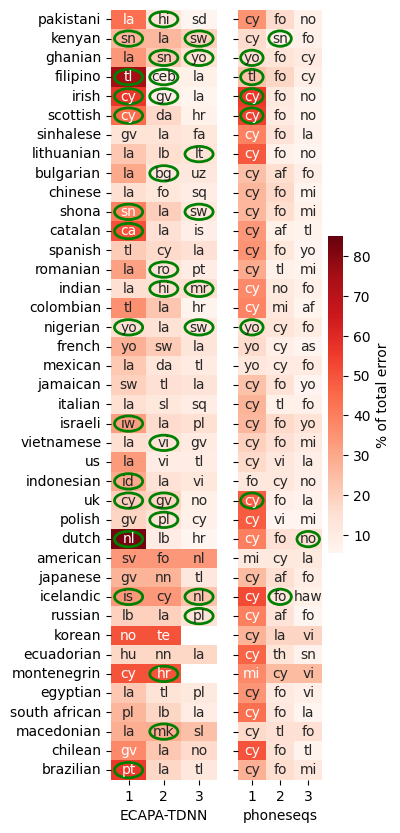

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

confusions_ET = {'scottish': [('cy', 43.8), ('da', 16.3), ('hr', 5.9)],
 'sinhalese': [('gv', 13.1), ('la', 13.1), ('fa', 11.5)],
 'lithuanian': [('la', 21.3), ('lb', 14.8), ('lt', 12.4)],
 'bulgarian': [('la', 29.1), ('bg', 10.8), ('uz', 10.3)],
 'chinese': [('la', 14.4), ('fo', 11.5), ('sq', 8.7)],
 'shona': [('sn', 38.9), ('la', 19.4), ('sw', 11.1)],
 'catalan': [('ca', 50.1), ('la', 13.9), ('is', 7.5)],
 'spanish': [('tl', 19.9), ('cy', 16.0), ('la', 13.9)],
 'romanian': [('la', 31.0), ('ro', 12.6), ('pt', 8.3)],
 'indian': [('la', 14.4), ('hi', 14.4), ('mr', 14.4)],
 'colombian': [('tl', 35.1), ('la', 21.6), ('hr', 5.4)],
 'nigerian': [('yo', 14.6), ('la', 13.7), ('sw', 10.9)],
 'french': [('yo', 27.3), ('sw', 20.2), ('la', 12.1)],
 'mexican': [('la', 20.9), ('da', 11.6), ('tl', 9.3)],
 'pakistani': [('la', 43.3), ('hi', 12.0), ('sd', 4.3)],
 'kenyan': [('sn', 26.0), ('la', 25.2), ('sw', 18.6)],
 'ghanian': [('la', 33.2), ('sn', 21.0), ('yo', 13.2)],
 'filipino': [('tl', 75.0), ('ceb', 7.1), ('la', 7.1)],
 'irish': [('cy', 55.7), ('gv', 7.2), ('la', 5.2)],
 'jamaican': [('sw', 18.8), ('tl', 13.9), ('la', 12.5)],
 'italian': [('la', 14.1), ('sl', 11.4), ('sq', 8.6)],
 'israeli': [('iw', 31.5), ('la', 15.4), ('pl', 14.1)],
 'vietnamese': [('la', 14.4), ('vi', 12.6), ('gv', 9.3)],
 'us': [('la', 32.4), ('vi', 8.1), ('tl', 8.1)],
 'indonesian': [('id', 29.0), ('la', 13.5), ('vi', 11.5)],
 'uk': [('cy', 19.4), ('gv', 17.5), ('no', 7.1)],
 'polish': [('gv', 17.4), ('pl', 13.0), ('cy', 6.5)],
 'dutch': [('nl', 82.6), ('lb', 8.7), ('hr', 4.3)],
 'american': [('sv', 33.3), ('fo', 33.3), ('nl', 33.3)],
 'japanese': [('gv', 26.3), ('nn', 26.3), ('tl', 10.5)],
 'icelandic': [('is', 33.3), ('cy', 33.3), ('nl', 22.2)],
 'russian': [('lb', 18.8), ('la', 18.8), ('pl', 12.5)],
 'korean': [('no', 50.0), ('te', 50.0)],
 'ecuadorian': [('hu', 16.7), ('nn', 16.7), ('la', 16.7)],
 'montenegrin': [('cy', 50.0), ('hr', 50.0)],
 'egyptian': [('la', 21.2), ('tl', 13.1), ('pl', 10.1)],
 'south african': [('pl', 25.9), ('lb', 17.2), ('la', 8.6)],
 'macedonian': [('la', 27.7), ('mk', 27.7), ('sl', 23.4)],
 'chilean': [('gv', 36.8), ('la', 21.1), ('no', 15.8)],
 'brazilian': [('pt', 55.6), ('la', 16.7), ('tl', 11.1)]}


confusions_PS = {'italian': [('cy', 27.1), ('tl', 7.9), ('fo', 7.5)],
 'lithuanian': [('cy', 49.1), ('fo', 7.4), ('no', 5.7)],
 'bulgarian': [('cy', 24.1), ('af', 15.9), ('fo', 8.7)],
 'korean': [('cy', 27.3), ('la', 18.2), ('vi', 18.2)],
 'uk': [('cy', 48.6), ('fo', 8.5), ('la', 6.8)],
 'chinese': [('cy', 26.6), ('fo', 17.4), ('mi', 6.4)],
 'ecuadorian': [('cy', 46.7), ('th', 13.3), ('sn', 6.7)],
 'romanian': [('cy', 29.2), ('tl', 7.4), ('mi', 6.4)],
 'indian': [('cy', 37.5), ('no', 11.0), ('fo', 7.7)],
 'pakistani': [('cy', 35.0), ('fo', 16.6), ('no', 7.6)],
 'polish': [('cy', 48.2), ('vi', 5.9), ('mi', 5.9)],
 'scottish': [('cy', 54.0), ('fo', 10.3), ('no', 6.3)],
 'sinhalese': [('cy', 39.0), ('fo', 13.6), ('la', 6.8)],
 'dutch': [('cy', 40.0), ('fo', 15.0), ('no', 15.0)],
 'american': [('mi', 11.1), ('cy', 11.1), ('la', 11.1)],
 'japanese': [('cy', 25.0), ('af', 15.6), ('fo', 9.4)],
 'icelandic': [('cy', 52.0), ('fo', 12.0), ('haw', 8.0)],
 'french': [('yo', 16.5), ('cy', 8.3), ('as', 5.8)],
 'shona': [('cy', 26.3), ('fo', 15.8), ('mi', 7.9)],
 'catalan': [('cy', 33.7), ('af', 7.9), ('tl', 6.5)],
 'spanish': [('cy', 34.8), ('fo', 12.3), ('yo', 5.8)],
 'russian': [('cy', 39.7), ('af', 13.7), ('fo', 5.5)],
 'colombian': [('cy', 38.8), ('mi', 12.2), ('af', 6.1)],
 'mexican': [('yo', 12.2), ('cy', 10.2), ('fo', 10.2)],
 'filipino': [('tl', 23.2), ('fo', 17.9), ('cy', 8.9)],
 'tagalog': [('cy', 83.3), ('mt', 16.7)],
 'nigerian': [('yo', 14.8), ('cy', 13.4), ('fo', 9.8)],
 'montenegrin': [('mi', 37.5), ('cy', 25.0), ('vi', 25.0)],
 'kenyan': [('cy', 16.4), ('sn', 7.4), ('fo', 7.3)],
 'ghanian': [('yo', 14.8), ('fo', 13.4), ('cy', 10.5)],
 'indonesian': [('fo', 11.6), ('cy', 11.6), ('no', 8.8)],
 'egyptian': [('cy', 34.4), ('fo', 10.9), ('vi', 8.3)],
 'south african': [('cy', 43.8), ('fo', 11.6), ('la', 5.4)],
 'macedonian': [('cy', 17.0), ('tl', 14.9), ('fo', 14.9)],
 'irish': [('cy', 55.9), ('fo', 11.3), ('no', 5.6)],
 'jamaican': [('cy', 23.7), ('fo', 14.2), ('yo', 5.9)],
 'chilean': [('cy', 50.0), ('fo', 14.5), ('tl', 6.5)],
 'brazilian': [('cy', 28.0), ('fo', 16.0), ('mi', 12.0)],
 'israeli': [('cy', 26.0), ('fo', 17.1), ('yo', 14.4)],
 'vietnamese': [('cy', 19.5), ('fo', 15.0), ('mi', 10.9)],
 'us': [('cy', 17.1), ('vi', 11.4), ('la', 8.6)]}


accent_language_map = {
    "pakistani": ["hi", "ur"],
    "kenyan": ["sw", "sn"],
    "ghanian": ["yo", "sn"],
    "filipino": ["tl", "ceb"],
    "irish": ["cy", "gv"],
    "scottish": ["cy", "gd"],
    "sinhalese": [],
    "lithuanian": ["lt", "lv"],
    "bulgarian": ["bg", "mk"],
    "chinese": ["zh", "yue"],
    "shona": ["sn", "sw"],
    "catalan": ["ca", "es"],
    "spanish": ["es", "ca"],
    "romanian": ["ro"],
    "indian": ["hi", "mr", "ta", "te"],
    "colombian": ["es", "qu"],
    "nigerian": ["yo", "sw"],
    "french": ["fr", "oc"],
    "mexican": ["es", "nah"],
    "jamaican": ["en", "jam"],
    "italian": ["it", "sc"],
    "israeli": ["iw", "ar"],
    "vietnamese": ["vi", "hmn"],
    "us": ["en", "es"],
    "indonesian": ["id", "jv"],
    "uk": ["gv", "cy"],
    "polish": ["pl", "cs"],
    "dutch": ["nl", "no"],
    "american": ["en", "es"],
    "japanese": ["ja", "ryu"],
    "icelandic": ["is", "nl", "fo"],
    "russian": ["ru", "pl"],
    "korean": ["ko", "zh"],
    "ecuadorian": ["es", "qu"],
    "montenegrin": ["hr"],
    "egyptian": ["ar", "cop"],
    "south african": ["af", "zu"],
    "macedonian": ["mk", "bg"],
    "chilean": ["es", "map"],
    "brazilian": ["pt", "tup"]
}



# Your data (confusions_ET, confusions_PS, accent_language_map) remains the same

accent_groups = [list(accent_language_map.keys())[i:i+40] for i in range(0, len(accent_language_map), 40)]
accents = accent_language_map.keys()

# Create subplots with 2 columns (one for ET and one for PS)
fig, axes = plt.subplots(1, 2, figsize=(3, 10), sharey=False)

# Put space between subplots
# plt.subplots_adjust(wspace=0.5)
# Put space between subplot 2 and 3
plt.subplots_adjust(wspace=0.2)
# Make subplot 0 and 2 wider

# axes[0].set_position([0.1, 0.1, 0.4, 0.8])
# axes[2].set_position([0.5, 0.1, 0.4, 0.8])

# Put thick black line between subplot 2 and 3

# axes[2].vlines(x=axes[1].get_xlim()[0] - 3, ymin=axes[1].get_ylim()[0], ymax=axes[1].get_ylim()[1], color='black', linewidth=2)
# axes[1].plot([axes[1].get_xlim()[1], axes[1].get_xlim()[1]], [axes[1].get_ylim()[0], axes[1].get_ylim()[1]], color='black', linewidth=2)



cmap = sns.color_palette("Reds", as_cmap=True)

for idx, accents in enumerate(accent_groups):

    # print("idx", idx)
    labels_et = []
    values_et = []
    row_labels_et = []

    labels_ps = []
    values_ps = []
    row_labels_ps = []

    for accent in accents:
        # For ET
        labels_et.append([conf[0] for conf in confusions_ET[accent]])
        values_et.append([conf[1] for conf in confusions_ET[accent]])
        row_labels_et.append(f"{accent}")

        # For PS
        labels_ps.append([conf[0] for conf in confusions_PS[accent]])
        values_ps.append([conf[1] for conf in confusions_PS[accent]])
        row_labels_ps.append(f"{accent}")

    # DataFrames for ET and PS
    df_et = pd.DataFrame(values_et, columns=["1", "2", "3"], index=row_labels_et)
    labels_df_et = pd.DataFrame(labels_et, columns=["1", "2", "3"], index=row_labels_et)

    df_ps = pd.DataFrame(values_ps, columns=["1", "2", "3"])
    labels_df_ps = pd.DataFrame(labels_ps, columns=["1", "2", "3"])

    # ET heatmap (left column)
    ax_et = axes[idx*2]
    cbar = False  # No color bar for ET
    sns.heatmap(df_et, vmax = 85, annot=labels_df_et, fmt="", cmap=cmap, ax=ax_et, cbar=cbar)
    ax_et.set_xlabel(f"ECAPA-TDNN")

    # PS heatmap (right column)
    ax_ps = axes[idx*2+ 1]
    cbar = idx*2+ 1 == 1  # Only show color bar for the rightmost subfigure
    sns.heatmap(df_ps, vmax = 85, annot=labels_df_ps, fmt="", cmap=cmap, ax=ax_ps, cbar=cbar, cbar_kws={'label': '% of total error'})
    ax_ps.set_xlabel(f"phoneseqs")

    # Highlight accent-related languages and add thick black lines for both ET and PS
    for i, accent in enumerate(row_labels_et):
        base_accent = accent  # Remove "ET" or "PS" part
        for j in range(3):
            if labels_df_et.iloc[i, j] in accent_language_map[base_accent]:
                ax_et.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))

        # if i % 2 == 1:
        #     x_min, x_max = ax_et.get_xlim()
        #     ax_et.hlines(i + 1, x_min-10, x_max, colors='black', linewidth=2)  # Thick black line for ET

        # Repeat for PS (right column)
        for j in range(3):
            if labels_df_ps.iloc[i, j] in accent_language_map[base_accent]:
                ax_ps.add_patch(plt.Circle((j+0.5, i+0.5), radius=0.4, fill=False, edgecolor='green', lw=2))

        # if i % 2 == 1:
        #     x_min, x_max = ax_ps.get_xlim()
        #     ax_ps.hlines(i + 1, x_min-10, x_max, colors='black', linewidth=2)  # Thick black line for PS

    # Set the labels for the yticks, which show for each subplot
    ax_et.set_yticks(np.arange(len(row_labels_et)) + 0.5, labels=row_labels_et)
    # Set empty yticks for PS
    ax_ps.set_yticks(np.arange(len(row_labels_ps)) + 0.5, labels=["" for _ in range(len(row_labels_ps))])

# Set the common y-label for all subplots
# axes[0, 0].set_ylabel("Accents")
# axes[0, 1].set_ylabel("Accents")

plt.savefig("accent_confusions.pdf", bbox_inches='tight')
